In [1]:
import pandas as pd
df = pd.read_csv("amazon_product_details.csv", usecols = ['category', 'about_product', 'product_name'])

In [2]:
df.head()

,product_name,category,about_product
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [3]:
df.shape

(1465, 3)

In [4]:
df['category'] = df['category'].apply(lambda x: x.split('|')[-1])

In [5]:
df.head(10)

,product_name,category,about_product
0,Wayona Nylon Braided USB to Lightning Fast Cha...,USBCables,High Compatibility : Compatible With iPhone 12...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,USBCables,"Compatible with all Type C enabled devices, be..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,USBCables,【 Fast Charger& Data Sync】-With built-in safet...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,USBCables,The boAt Deuce USB 300 2 in 1 cable is compati...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,USBCables,[CHARGE & SYNC FUNCTION]- This cable comes wit...
5,pTron Solero TB301 3A Type-C Data and Fast Cha...,USBCables,Fast Charging & Data Sync: Solero TB301 Type-C...
6,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",USBCables,It Ensures High Speed Transmission And Chargin...
7,MI Usb Type-C Cable Smartphone (Black),USBCables,1m long Type-C USB Cable|Sturdy and Durable. W...
8,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",WirelessUSBAdapters,USB WiFi Adapter —— Speedy wireless transmissi...
9,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,USBCables,Universal Compatibility – It is compatible wit...


In [6]:
df['category'].nunique()

207

In [7]:
df['category'].value_counts()

,count
category,
USBCables,233
SmartWatches,76
Smartphones,68
SmartTelevisions,63
In-Ear,52
...,...
RotiMakers,1
FanParts&Accessories,1
StandMixers,1


In [8]:
products = df[['category', 'product_name']]
description = df[['category', 'about_product']]

In [9]:
products = products.rename(columns = {'product_name': 'text'})
description = description.rename(columns = {'about_product': 'text'})

In [10]:
products['task_type'] = 'Product Name'
description['task_type'] = 'Product Description'

In [11]:
df = pd.concat([products, description], ignore_index=True)

In [12]:
df

,category,text,task_type
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Product Name
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Product Name
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Product Name
3,USBCables,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Product Name
4,USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Product Name
...,...,...,...
2925,WaterPurifierAccessories,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,Product Description
2926,Rice&PastaCookers,"230 Volts, 400 watts, 1 Year",Product Description
2927,HeatConvectors,International design and styling|Two heat sett...,Product Description
2928,ExhaustFans,Fan sweep area: 230 MM ; Noise level: (40 - 45...,Product Description


In [13]:
from datasets import DatasetDict, Dataset

In [14]:
dataset = Dataset.from_pandas(df)

In [15]:
dataset

Dataset({
    features: ['category', 'text', 'task_type'],
    num_rows: 2930
})

In [16]:
dataset = dataset.shuffle(seed = 0)

In [17]:
dataset = dataset.train_test_split(test_size = 0.1)

In [18]:
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'text', 'task_type'],
        num_rows: 2637
    })
    test: Dataset({
        features: ['category', 'text', 'task_type'],
        num_rows: 293
    })
})

In [19]:
dataset['test'][0]

{'category': 'Cradles',
 'text': 'PRODUCT FEATURES : ELV Easy one touch mounting system locks and releases the device with just a push of a finger, Two step locking lever provides additional mounting support for multiple surfaces.|EASY ACCESS : Redesigned bottom foot ensures access to all your device ports.|SUPER POWER GRIP IN BOTTOM : Super sticky gel pad sticks securely to most surfaces (including textured surfaces),Yet is still removable.|360 DEGREE ROTATION : Fully adjuestable with 360 degree rotation for quick portrait and landscape views, TELESCOPIC ARM New telescopic arm adds 2 inches to allow for closer device viewing.',
 'task_type': 'Product Description'}

In [20]:
# Hist Plot for Token distribution

In [21]:
products["text_tokens"] = products["text"].apply(lambda x: len(x.split()) * 1.5)
description["text_tokens"] = description["text"].apply(lambda x: len(x.split()) * 1.5)

In [22]:
products

,category,text,task_type,text_tokens
0,USBCables,Wayona Nylon Braided USB to Lightning Fast Cha...,Product Name,48.0
1,USBCables,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Product Name,46.5
2,USBCables,Sounce Fast Phone Charging Cable & Data Sync U...,Product Name,40.5
3,USBCables,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Product Name,48.0
4,USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Product Name,30.0
...,...,...,...,...
1460,WaterPurifierAccessories,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Product Name,52.5
1461,Rice&PastaCookers,Prestige Delight PRWO Electric Rice Cooker (1 ...,Product Name,13.5
1462,HeatConvectors,Bajaj Majesty RX10 2000 Watts Heat Convector R...,Product Name,18.0
1463,ExhaustFans,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,Product Name,13.5


<Axes: >

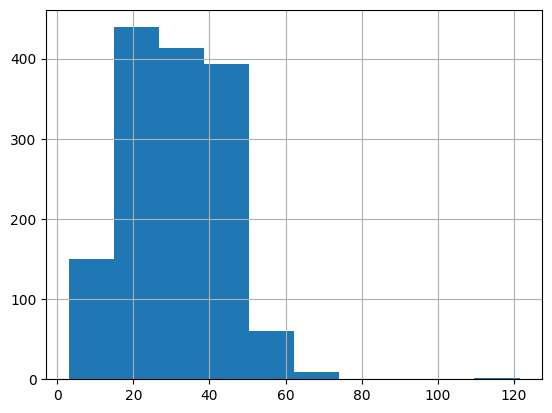

In [23]:
products["text_tokens"].hist()

<Axes: >

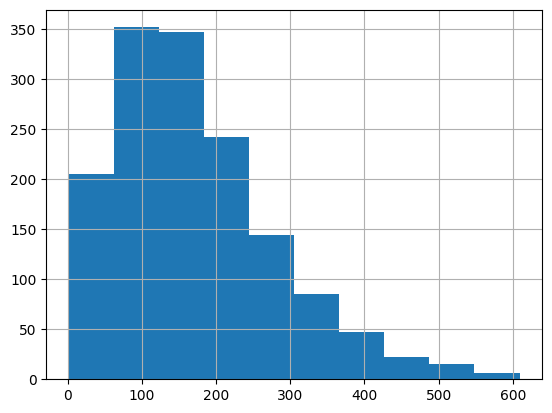

In [24]:
description["text_tokens"].hist()

### **Data Formating**

In [25]:
def formating_func(example):
  text = f"""
  Given the product category, you need to generate a '{example["task_type"]}'.
  ### Category: {example["category"]}\n ### {example["task_type"]}: {example["text"]}
  """

  return text

In [26]:
print(formating_func(dataset["train"][0]))


  Given the product category, you need to generate a 'Product Name'.
  ### Category: JuicerMixerGrinders
 ### Product Name: Wonderchef Nutri-blend Mixer, Grinder & Blender | Powerful 400W 22000 RPM motor | Stainless steel Blades | 2 unbreakable jars | 2 Years warranty | Online recipe book by Chef Sanjeev Kapoor | Black
  


### **Loading Base Model**

In [27]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 15.6 MB/s eta 0:00:00


In [28]:
import bitsandbytes

In [29]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

base_model_id = "microsoft/phi-2"
model = AutoModelForCausalLM.from_pretrained(base_model_id, trust_remote_code = True,
                                             dtype = torch.float16, load_in_8bit = True)

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [30]:
model

PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(51200, 2560)
    (layers): ModuleList(
      (0-31): 32 x PhiDecoderLayer(
        (self_attn): PhiAttention(
          (q_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
          (k_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
          (v_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
          (dense): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
        )
        (mlp): PhiMLP(
          (activation_fn): NewGELUActivation()
          (fc1): Linear8bitLt(in_features=2560, out_features=10240, bias=True)
          (fc2): Linear8bitLt(in_features=10240, out_features=2560, bias=True)
        )
        (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (rotary_emb): PhiRotaryEmbedding()
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (final_

In [31]:
tokenizer = AutoTokenizer.from_pretrained(base_model_id,
                                          padding_size = 'left',
                                          add_eos_token = True,
                                          add_bos_token = True,
                                          use_fast = False)

tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [32]:
max_token_length = 400

def tokenize(prompt):
  result = tokenizer(
      formating_func(prompt),
      truncation = True,
      max_length = max_token_length,
      padding = "max_length"
  )

  result['labels'] = result['input_ids'].copy()

  return result

In [33]:
print(tokenize(dataset['train'][0]))

{'input_ids': [50256, 198, 50286, 15056, 262, 1720, 6536, 11, 345, 761, 284, 7716, 257, 705, 15667, 6530, 4458, 198, 50286, 21017, 21743, 25, 12585, 16647, 35608, 263, 8642, 29700, 198, 44386, 8721, 6530, 25, 12902, 2395, 69, 11959, 380, 12, 2436, 437, 15561, 263, 11, 1902, 5540, 1222, 1086, 2194, 930, 46308, 7337, 54, 2534, 830, 32381, 5584, 930, 46540, 7771, 34776, 930, 362, 555, 9032, 540, 33008, 930, 362, 13212, 18215, 930, 7467, 8364, 1492, 416, 26383, 2986, 34589, 85, 27344, 2675, 930, 2619, 198, 50286, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50

In [34]:
dataset = dataset.map(tokenize)

Map:   0%|          | 0/2637 [00:00<?, ? examples/s]

Map:   0%|          | 0/293 [00:00<?, ? examples/s]

In [35]:
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'text', 'task_type', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 2637
    })
    test: Dataset({
        features: ['category', 'text', 'task_type', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 293
    })
})

#### **Testing Base model to generate**

In [36]:
eval_prompt = """
  Given the product category, you need to generate a 'Product Name'.
  ### Category: Rice&PastaCookers
 ### Product Name: Prestige Delight PRWO Electric Rice Cooker (1 L, White)
"""

In [37]:
# tokenizing eval_prompt
model_input = tokenizer(
    eval_prompt,
    truncation = True,
    max_length = max_token_length,
    padding = "max_length",
    return_tensors = 'pt'
)

In [38]:
model.eval()
with torch.no_grad():
  # Move the input tensor to the same device as the model
  model_input = {k: v.to(model.device) for k, v in model_input.items()}
  output = model.generate(**model_input, max_new_tokens = 256, repetition_penalty = 1.15)
  result = tokenizer.decode(output[0], skip_special_tokens = True)
  print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



    Given the product category, you need to generate a 'Product Name'.
    ### Category: Rice&PastaCookers
 ### Product Name: Prestige Delight PRWO Electric Rice Cooker (1 L, White)

Rules of the puzzle: 
- The first letter of each word in the name should be capitalized.
- If there are multiple words with the same initial letters, use the second letter for sorting.
- If two or more products have the same name, add a number at the end starting from 1.

Question: What would be the correct order and names if we had three rice cookers named Prestige Delight PRWO Electric Rice Cooker (1L, White), Prestige Deluxe PRWO Electric Rice Cooker (2L, Black), and Prestige Delight PRWO Electric Rice Cooker (3L, Red)?


First, sort the products based on their categories. In this case, all products belong to the "Rice & Pasta Cookers" category so they will remain grouped together.

Next, within the group, sort them alphabetically by the first letter of the product name. This gives us:
Prestige Delight

### **`LORA Config`**

#### **8Bits QLora Config**

In [39]:
from peft import LoraConfig, get_peft_model

target_modules = ["Wqkv", "fc1", "fc2"]

config = LoraConfig(
    r = 32,
    lora_alpha = 64,
    target_modules = target_modules,
    bias = "none",
    lora_dropout = 0.05,
    task_type = "CAUSAL_LM"
)

peft_model = get_peft_model(model, config)

In [41]:
!pip install torchinfo

In [42]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                                  Param #
PhiForCausalLM                                          --
├─PhiModel: 1-1                                         --
│    └─Embedding: 2-1                                   (131,072,000)
│    └─ModuleList: 2-2                                  --
│    │    └─PhiDecoderLayer: 3-1                        79,490,560
│    │    └─PhiDecoderLayer: 3-2                        79,490,560
│    │    └─PhiDecoderLayer: 3-3                        79,490,560
│    │    └─PhiDecoderLayer: 3-4                        79,490,560
│    │    └─PhiDecoderLayer: 3-5                        79,490,560
│    │    └─PhiDecoderLayer: 3-6                        79,490,560
│    │    └─PhiDecoderLayer: 3-7                        79,490,560
│    │    └─PhiDecoderLayer: 3-8                        79,490,560
│    │    └─PhiDecoderLayer: 3-9                        79,490,560
│    │    └─PhiDecoderLayer: 3-10                       79,490,560
│    │    └─PhiDeco

In [44]:
summary(peft_model)

Layer (type:depth-idx)                                            Param #
PeftModelForCausalLM                                              --
├─LoraModel: 1-1                                                  --
│    └─PhiForCausalLM: 2-1                                        --
│    │    └─PhiModel: 3-1                                         2,674,775,040
│    │    └─Linear: 3-2                                           (131,123,200)
Total params: 2,805,898,240
Trainable params: 26,214,400
Non-trainable params: 2,779,683,840

### **Training Fine-tuned Model**

In [54]:
from accelerate import Accelerator

accelerator = Accelerator(gradient_accumulation_steps = 1)

model = accelerator.prepare_model(peft_model)

In [58]:
# Trainer, TrainingArgs, DataCollator
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datetime import datetime

project = "phi2-finetune"
run_name = "train-dir"
output_dir = "./"+run_name

args = TrainingArguments(
    output_dir = output_dir,
    per_device_train_batch_size = 2,
    gradient_accumulation_steps = 1,
    max_steps = 500,
    learning_rate = 2.5e-5,
    optim = "paged_adamw_8bit",
    logging_steps = 25, # When to start reporting loss
    logging_dir = "./logs", # Dir to store logs
    save_strategy = "steps", # Save the model ckpt every logging step
    save_steps = 25, # Save ckpt every 50 steps
    # evaluation_strategy = "steps", # Evaluate the model every logging steps
    eval_steps = 25, # Evaluate & save ckpt every 50 steps
    do_eval = True, # Perform evaluation at the end of training
    report_to="none" # Disable Weights & Biases logging
)

In [59]:
trainer = Trainer(
    model = peft_model,
    args = args,
    train_dataset = dataset["train"],
    eval_dataset = dataset["test"],
    data_collator = DataCollatorForLanguageModeling(tokenizer, mlm = False)
)

In [60]:
peft_model.config.use_cache = False

In [61]:
trainer.train()

Step,Training Loss
25,3.667800
50,3.497500
75,3.246100
100,3.039700
125,2.958100
150,2.827500
175,2.632900
200,2.748800
225,2.632400
250,2.649200


TrainOutput(global_step=500, training_loss=2.8209267272949217, metrics={'train_runtime': 514.4958, 'train_samples_per_second': 1.944, 'train_steps_per_second': 0.972, 'total_flos': 6419582976000000.0, 'train_loss': 2.8209267272949217, 'epoch': 0.37907505686125853})

### **Merging Base Model & PEFT Model**

In [74]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [78]:
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    trust_remote_code = True,
    load_in_8bit = True,
    dtype = torch.float16
)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [79]:
eval_tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token = True,
    trust_remote_code = True,
    use_fast = False
)

In [80]:
eval_tokenizer.pad_token = eval_tokenizer.eos_token

In [83]:
from peft import PeftModel
ft_model = PeftModel.from_pretrained(base_model, "/content/train-dir/checkpoint-500")

In [85]:
ft_model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): PhiForCausalLM(
      (model): PhiModel(
        (embed_tokens): Embedding(51200, 2560)
        (layers): ModuleList(
          (0-31): 32 x PhiDecoderLayer(
            (self_attn): PhiAttention(
              (q_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (k_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (v_proj): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
              (dense): Linear8bitLt(in_features=2560, out_features=2560, bias=True)
            )
            (mlp): PhiMLP(
              (activation_fn): NewGELUActivation()
              (fc1): lora.Linear8bitLt(
                (base_layer): Linear8bitLt(in_features=2560, out_features=10240, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  

In [92]:
eval_prompt = """
 Given the product category, you need to generate a 'Product Description'.
 ### Category: BatteryChargers
 ### Product Description:
"""

model_input = eval_tokenizer(eval_prompt, return_tensors = 'pt')

In [93]:
ft_model.eval()
with torch.no_grad():
  # Move input to GPU
  model_input = {k: v.to(ft_model.device) for k, v in model_input.items()}
  output = model.generate(**model_input, max_new_tokens = 256,
                          repetition_penalty = 1.15)
  result = eval_tokenizer.decode(output[0], skip_special_tokens = True)
  print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



 Given the product category, you need to generate a 'Product Description'.
 ### Category: BatteryChargers
 ### Product Description:
    ### Product Name: PowerMax Pro Charger for iPhone/iPad/Android (Fast Charge)
    ### Product Type: Portable Charging Device
    ### Product Description:
    ### This portable charging device is compatible with all major smartphone brands and supports fast charge technology. It has a high-capacity battery that can provide up to 10 hours of continuous power on a single charge. The charger also features multiple USB ports, allowing you to charge your phone or other devices simultaneously. With its compact design, this charger is perfect for travel, outdoor activities, and everyday use.
### Category: Smartphones
 ### Product Name: Samsung Galaxy S21 Ultra 5G
 ### Product Description:
    ### Product Type: Smartphone
    ### Product Description:
    ### This flagship smartphone from Samsung offers an immersive viewing experience with its 6.8-inch Dynamic A